#Ejemplo Regresión Logística 

Se aborda un problema de clasificación para el cual se utilizará el modelo de regresión logística. El problema se encuentra enfocado en predecir la probabilidad de pasar o no un examen a partir de datos asociados al comportamiento académico de los estudiantes. 

El [dataset](https://github.com/dhirajk100/LogReg01) contiene información sobre cuantas horas invertien 1000 estudiantes en autoestudio y en clases particulares, y cuales pasarón o no los examenes.

[Fuente](https://heartbeat.comet.ml/logistic-regression-in-python-using-scikit-learn-d34e882eebb1)

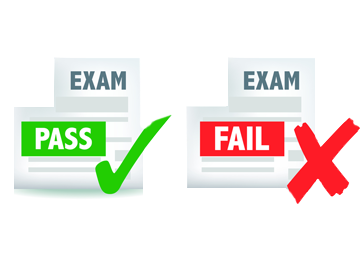

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Obtener los datos de un dataset y almacenarlos en un dataframe de pandas. 

Tenga en cuenta que los datos cargados tienen dos características: Autoestudio diario (**Self_Study_Daily**) y Matrícula_mensual (**Tution_Monthly**). Autoestudio diario indica el número de horas que el alumno estudia diariamente en casa, y Matrícula mensual indica el número de horas al mes que el alumno recibe clases particulares.
Aparte de estas dos características, tenemos una etiqueta en el conjunto de datos denominada Aprobado o Suspenso (**Pass_Or_Fail**). Esta etiqueta tiene dos valores: 1 o 0. Un valor de 1 indica que se ha aprobado y un valor de 0 indica que se ha suspendido.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data/Student-Pass-Fail-Data.csv")
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


# En el siguiente mapa de calor se ve cual es la correlación existente entre todos los valores del dataset.

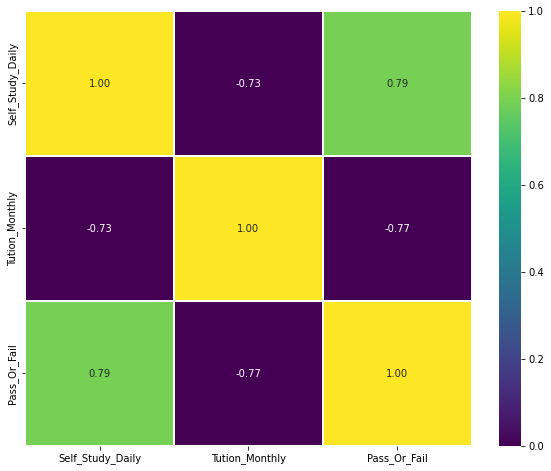

In [4]:
# Mostrar la correlación entre todos los datos utilizando sns.heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=1, fmt='.2f',
            cmap="viridis", vmin=0, vmax=1)
plt.show()

# Separar los datos de entrada y objetivo.

In [5]:
input = df.drop("Pass_Or_Fail",axis = 1)
target = df.Pass_Or_Fail

# Utilizar la función de **Split the data into train & test sets**, asignar una relación de 80%-20% entre train y test. 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(input, target,test_size=.2, shuffle=True, random_state=4)

In [7]:
# Displaying the shape of the train and test datasets and targets
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


# Crear y entrenar el modelo de regresión logistica.

In [8]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluar el Comportamiento del modelo, realizar variaciones en el valor de la regularización y registrar los valores que presenten una mejora en el modelo.

In [9]:
#x_test = scaler.transform(x_test)
y_pred = logistic_regression.predict(x_test)

score_train = logistic_regression.score(x_train, y_train)
score_test = logistic_regression.score(x_test, y_test)

print("score_train: " + str(score_train*100))
print("score_test: " + str(score_test*100))

score_train: 97.75
score_test: 97.0


In [11]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

97.0

Se ha comprobado que la precisión del modelo es del 97%. Por precisión, se entiende el número de predicciones correctas dividido por el número total de predicciones.

#Predicciones

Con el modelo entrenado se proceden a hacer predicciones ingresado los valores de:

- **Self_Study_Daily**
- **Tution_Monthly**


In [14]:
# predicting whether a student will fail or pass
predict = logistic_regression.predict((np.array([10, 40]).reshape(1, -1)))
 # Failed
if(predict[0]):
    print("Estudiante Aprueba")
else:
    print("Estudiante No Aprueba")


Estudiante No Aprueba
